In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
from google.colab import files
u = files.upload()

Saving apple_quality.csv to apple_quality (1).csv


In [14]:
data = pd.read_csv("apple_quality.csv")
data.drop("A_id",axis=1,inplace=True)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.2+ KB


In [27]:
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

In [79]:
data["Quality"].unique()

array(['good', 'bad'], dtype=object)

In [66]:
x = data.drop("Quality",axis=1)
y = data["Quality"]
xt,xs,yt,ys=train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
param_log = {
    'max_iter': [150,300,500,1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [35]:
grid = GridSearchCV(LogisticRegression(),param_log,cv=5).fit(xt,yt)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: On

{'C': 10, 'max_iter': 150, 'penalty': 'l1', 'solver': 'saga'}

In [36]:
grid.best_score_

0.744375

In [60]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [64]:
grid = GridSearchCV(KNeighborsClassifier(),param_knn,cv=5).fit(xt,yt)
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [67]:
grid.best_score_

0.8992424242424242

In [53]:
param_dt = {
    'max_depth': [5, 10, 15, 20, 25,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [54]:
grid = GridSearchCV(DecisionTreeClassifier(),param_dt,cv=5).fit(xt,yt)
grid.best_params_

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [45]:
grid.best_score_

0.8078125

In [56]:
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [57]:
grid = GridSearchCV(RandomForestClassifier(),param_rf,cv=5).fit(xt,yt)
grid.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [58]:
grid.best_score_

0.8803124999999999

In [72]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5, weights = 'distance').fit(xt,yt)
knn_pred = knn.predict(xs)
print(f"KNN Accuracy: {accuracy_score(ys,knn_pred):0.2%}")

KNN Accuracy: 89.75%


In [73]:
rf = RandomForestClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=2,n_estimators=100,n_jobs=-1).fit(xt,yt)
rf_pred = rf.predict(xs)
print(f"RF Accuracy: {accuracy_score(ys,rf_pred):0.2%}")

RF Accuracy: 91.00%


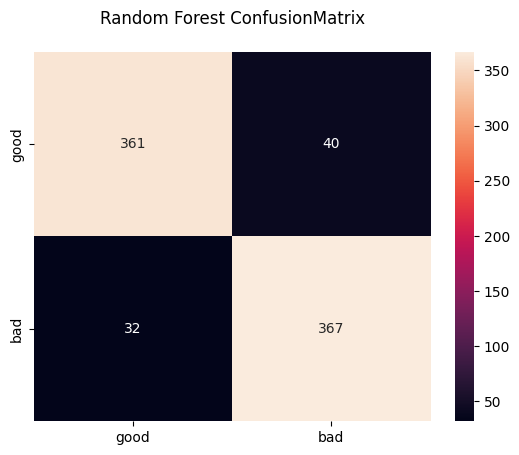

In [80]:
conf = confusion_matrix(ys,rf_pred)
plt.title("Random Forest ConfusionMatrix",pad=20)
a = sns.heatmap(conf,annot=True,fmt='g')
a.set_xticklabels(['good', 'bad'])
a.set_yticklabels(['good', 'bad'])
plt.show()